In [2]:
!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

In [10]:
key ='1db741c19898df8168e068f294926a044aa4fbca'

In [11]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [12]:
import pandas as pd

In [13]:
df.to_csv('AAPL.csv')

In [14]:
df = pd.read_csv('AAPL.csv')

In [15]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-06-13 00:00:00+00:00,97.34,99.120,97.10,98.69,38020494,22.730199,23.145853,22.674156,23.045442,152081976,0.0,1.0
1,AAPL,2016-06-14 00:00:00+00:00,97.46,98.475,96.75,97.32,31931944,22.758221,22.995237,22.592426,22.725529,127727776,0.0,1.0
2,AAPL,2016-06-15 00:00:00+00:00,97.14,98.410,97.03,97.82,29445227,22.683496,22.980058,22.657810,22.842285,117780908,0.0,1.0
3,AAPL,2016-06-16 00:00:00+00:00,97.55,97.750,96.07,96.45,31326815,22.779237,22.825940,22.433637,22.522372,125307260,0.0,1.0
4,AAPL,2016-06-17 00:00:00+00:00,95.33,96.650,95.30,96.62,61008219,22.260837,22.569075,22.253832,22.562069,244032876,0.0,1.0


In [16]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-06-04 00:00:00+00:00,125.89,126.16,123.8500,124.07,75169343,125.89,126.16,123.8500,124.07,75169343,0.0,1.0
1254,AAPL,2021-06-07 00:00:00+00:00,125.90,126.32,124.8321,126.17,71057550,125.90,126.32,124.8321,126.17,71057550,0.0,1.0
1255,AAPL,2021-06-08 00:00:00+00:00,126.74,128.46,126.2101,126.60,74403774,126.74,128.46,126.2101,126.60,74403774,0.0,1.0
1256,AAPL,2021-06-09 00:00:00+00:00,127.13,127.75,126.5200,127.21,56877937,127.13,127.75,126.5200,127.21,56877937,0.0,1.0
1257,AAPL,2021-06-10 00:00:00+00:00,126.11,128.19,125.9400,127.02,71186421,126.11,128.19,125.9400,127.02,71186421,0.0,1.0


In [17]:
df1 = df.reset_index()['close']

In [18]:
df1.head()

0    97.34
1    97.46
2    97.14
3    97.55
4    95.33
Name: close, dtype: float64

In [19]:
df1.shape

(1258,)

In [20]:
import matplotlib.pyplot as plt

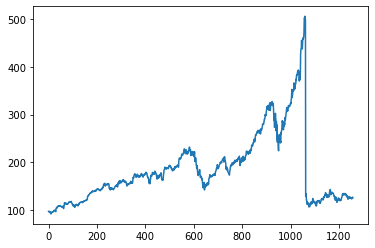

In [21]:
plt.plot(df1)

In [22]:
import numpy as np

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.01280039],
       [0.01309021],
       [0.01231735],
       ...,
       [0.0838063 ],
       [0.08474822],
       [0.08228475]])

In [28]:
df1.shape

(1258, 1)

**Spliting Datasets**

In [29]:
training_size=int(len(df1)*0.65)
test_size=len(df1) - training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(817, 441)

**Data Preprocessing**

In [40]:
def create_database(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0, 0,1,2,3,---99
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)        

In [41]:
time_step=100
X_train, y_train = create_database(train_data, time_step)
X_test, y_test = create_database(test_data, time_step)

In [44]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [45]:
X_test.shape,y_test.shape

((340, 100), (340,))

**Modelling**

In [46]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
###                      (716,340),     (timp_step)

In [47]:
##Stacked LSTM Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

In [48]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))##X_train.shape[1],1
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 127s 1s/step - loss: 0.0236 - val_loss: 0.0488
Epoch 2/10
12/12 [==============================] - 7s 574ms/step - loss: 0.0032 - val_loss: 0.0289
Epoch 3/10
12/12 [==============================] - 7s 617ms/step - loss: 0.0018 - val_loss: 0.0288
Epoch 4/10
12/12 [==============================] - 7s 617ms/step - loss: 9.5004e-04 - val_loss: 0.0227
Epoch 5/10
12/12 [==============================] - 7s 563ms/step - loss: 6.1406e-04 - val_loss: 0.0219
Epoch 6/10
12/12 [==============================] - 7s 574ms/step - loss: 4.8066e-04 - val_loss: 0.0219
Epoch 7/10
12/12 [==============================] - 7s 632ms/step - loss: 4.8619e-04 - val_loss: 0.0213
Epoch 8/10
12/12 [==============================] - 6s 501ms/step - loss: 4.1608e-04 - val_loss: 0.0201
Epoch 9/10
12/12 [==============================] - 6s 517ms/step - loss: 4.7136e-04 - val_loss: 0.0196
Epoch 10/10
12/12 [==============================] - 8s 716ms/step - loss: 4.

In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test) 

In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

172.988525995914

In [54]:
math.sqrt(mean_squared_error(y_test,test_predict))

241.7498700736937

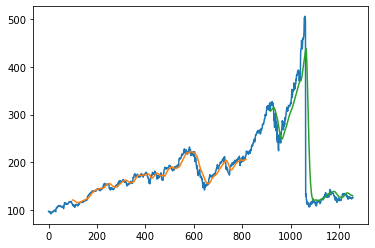

In [55]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()